In [1]:
%matplotlib inline

In [2]:
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

In [4]:
def AU_to_Rsol(a):
    return a*214.9394693836

In [5]:
def load_data(filename, mode):
    data = h5.File(filename)
    SP = data[mode + '_System_Parameters']
    
    if mode == 'BSE': 
        df = pd.DataFrame({
            'L1': SP['Luminosity(1)'][()],
            'L2': SP['Luminosity(2)'][()],
            'Teff1': SP['Teff(1)'][()],
            'Teff2': SP['Teff(2)'][()],
            'type1': SP['Stellar_Type(1)'][()],
            'type2': SP['Stellar_Type(2)'][()]
        })
            
    else:
        df = pd.DataFrame({
           'L': SP['Luminosity'][()],
           'Teff': SP['Teff'][()],
           'type': SP['Stellar_Type'][()]
        })

    return df

In [63]:
def plot_fractional_yield_q(filename, pdf = False):
    data = h5.File(filename)
    SP = data['BSE_System_Parameters']
    SP_df = pd.DataFrame({
                'type1': SP['Stellar_Type(1)'][()],
                'type2': SP['Stellar_Type(2)'][()],
                'Merger': SP['Merger'][()],
                'Mass_ZAMS1': SP['Mass@ZAMS(1)'][()],
                'Mass_ZAMS2': SP['Mass@ZAMS(2)'][()]
            })
    MS_SP_df = restrict(SP_df, 'type1', 0, 1)

    #-----------------------------------------------------mass ratio
    MS_SP_df.loc[:, "q"] = MS_SP_df.Mass_ZAMS2 / MS_SP_df.Mass_ZAMS1

    bins = np.linspace(0, 1, 40)  # Adjust the number of bins as needed
    MS_SP_df['q_bins'] = pd.cut(MS_SP_df['q'], bins)

    grouped = MS_SP_df.groupby('q_bins').agg(
        Total=('Merger', 'size'),
        Merger_Count=('Merger', lambda x: (x == 1).sum())
    ).reset_index()

    grouped['Fraction_Merger'] = grouped['Merger_Count'] / grouped['Total']
    #grouped['q_bins'] = grouped['q_bins'].astype(str)

    # Calculate midpoints for the bins
    midpoints = [(interval.left + interval.right) / 2 for interval in grouped['q_bins']]
    grouped['Midpoint'] = midpoints

    # Plot the results using midpoints
    plt.figure(figsize=(9, 7))
    plt.bar(grouped['Midpoint'], grouped['Fraction_Merger'], width=0.85*(grouped['Midpoint'][1] - grouped['Midpoint'][0]), color='mediumseagreen')
    plt.title('Fraction of Main Sequence Mergers by Initial Mass Ratio', fontsize = 17)
    plt.xlabel('Mass Ratio (M2/M1)', fontsize = 16)
    plt.ylabel('Fraction of Mergers', fontsize = 16)
    plt.xticks(np.round(np.linspace(grouped['Midpoint'].min(), grouped['Midpoint'].max(), 10),2), fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()
    plt.show()
    if pdf:
        plt.savefig(filename + "_init_q.pdf", format="pdf", bbox_inches='tight')
    
    return

C:\Users\minji\AppData\Local\Temp\ipykernel_13732\144418389.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MS_SP_df.loc[:, "q"] = MS_SP_df.Mass_ZAMS2 / MS_SP_df.Mass_ZAMS1
C:\Users\minji\AppData\Local\Temp\ipykernel_13732\144418389.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MS_SP_df['q_bins'] = pd.cut(MS_SP_df['q'], bins)


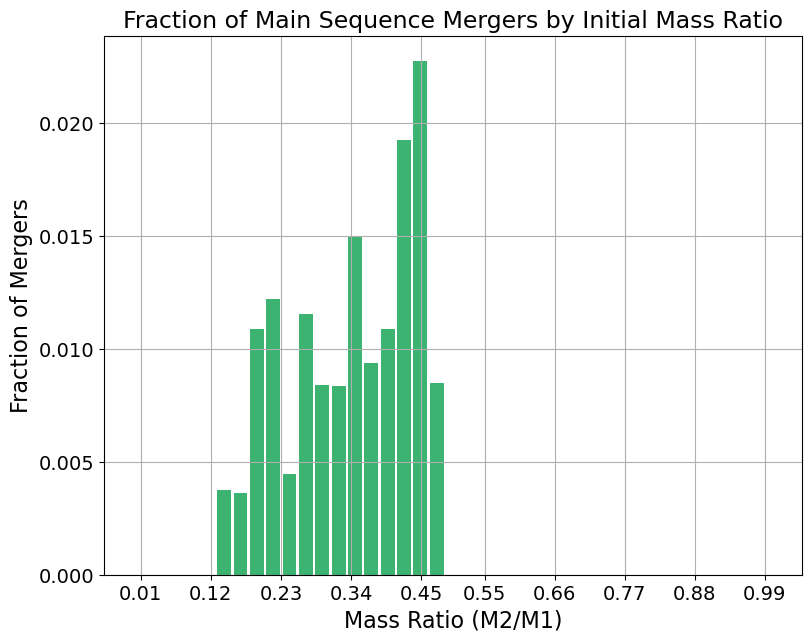

<Figure size 640x480 with 0 Axes>

In [56]:
plot_fractional_yield_q('COMPAS_Output.h5', pdf = True)

In [62]:
def plot_fractional_yield_a(filename, pdf = False):
    data = h5.File(filename)
    SP = data['BSE_System_Parameters']
    SP_df = pd.DataFrame({
                'type1': SP['Stellar_Type(1)'][()],
                'type2': SP['Stellar_Type(2)'][()],
                'Init_SemiMajorAxis': AU_to_Rsol(SP['SemiMajorAxis@ZAMS'][()]),
                'Merger': SP['Merger'][()]
            })
    MS_SP_df = restrict(restrict(SP_df, 'type1', 0, 1), 'Init_SemiMajorAxis', 0, 50)

    bins = np.linspace(MS_SP_df['Init_SemiMajorAxis'].min(), MS_SP_df['Init_SemiMajorAxis'].max(), 40) 
    MS_SP_df['a_bins'] = pd.cut(MS_SP_df['Init_SemiMajorAxis'], bins)

    grouped = MS_SP_df.groupby('a_bins').agg(
        Total=('Merger', 'size'),
        Merger_Count=('Merger', lambda x: (x == 1).sum())
    ).reset_index()

    grouped['Fraction_Merger'] = grouped['Merger_Count'] / grouped['Total']

    # Calculate midpoints for the bins
    midpoints = [(interval.left + interval.right) / 2 for interval in grouped['a_bins']]
    grouped['Midpoint'] = midpoints

    # Plot the results using midpoints
    plt.figure(figsize=(9, 7))
    plt.bar(grouped['Midpoint'], grouped['Fraction_Merger'], width=0.85*(grouped['Midpoint'][1] - grouped['Midpoint'][0]), color='mediumseagreen')
    plt.title('Fraction of Main Sequence Mergers by Initial Semi-Major Axis', fontsize = 17)
    plt.xlabel('Initial Semi-Major Axis (R_sun)', fontsize = 16)
    plt.ylabel('Fraction of Mergers', fontsize = 16)
    plt.xticks(np.linspace(grouped['Midpoint'].min(), grouped['Midpoint'].max(), 10), fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()
    plt.show()
    if pdf:
        plt.savefig(filename + "_init_a.pdf", format="pdf", bbox_inches='tight')
        
    return

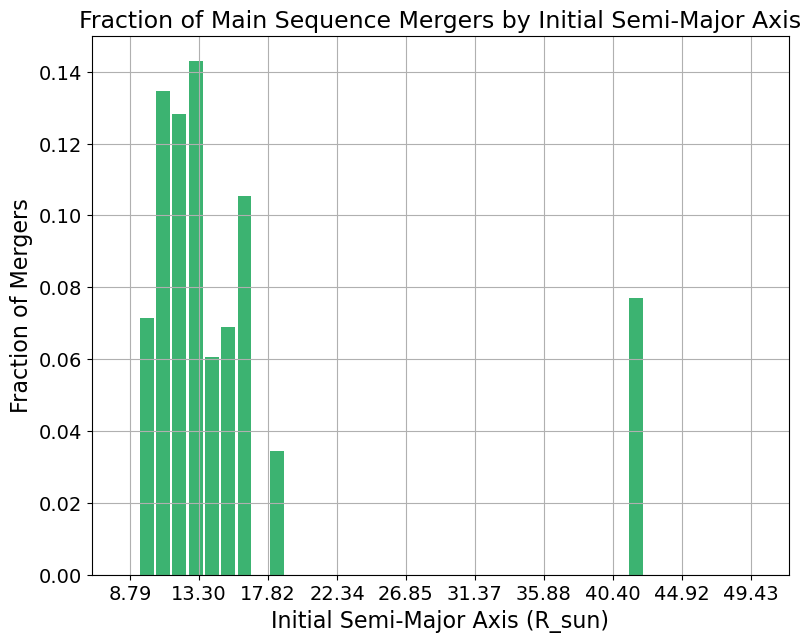

<Figure size 640x480 with 0 Axes>

In [58]:
plot_fractional_yield_a('COMPAS_Output.h5', pdf = True)

In [60]:
def plot_fractional_yield_m1(filename, pdf = False):
    data = h5.File(filename)
    SP = data['BSE_System_Parameters']
    SP_df = pd.DataFrame({
                'type1': SP['Stellar_Type(1)'][()],
                'type2': SP['Stellar_Type(2)'][()],
                'Init_SemiMajorAxis': AU_to_Rsol(SP['SemiMajorAxis@ZAMS'][()]),
                'Merger': SP['Merger'][()],
                'Mass_ZAMS1': SP['Mass@ZAMS(1)'][()],
                'Mass_ZAMS2': SP['Mass@ZAMS(2)'][()]
            })
    MS_SP_df = restrict(SP_df, 'type1', 0, 1)

    bins = np.linspace(MS_SP_df['Mass_ZAMS1'].min(), MS_SP_df['Mass_ZAMS1'].max(), 40) 
    MS_SP_df['m_bins'] = pd.cut(MS_SP_df['Mass_ZAMS1'], bins)

    grouped = MS_SP_df.groupby('m_bins').agg(
        Total=('Merger', 'size'),
        Merger_Count=('Merger', lambda x: (x == 1).sum())
    ).reset_index()

    grouped['Fraction_Merger'] = grouped['Merger_Count'] / grouped['Total']

    # Calculate midpoints for the bins
    midpoints = [(interval.left + interval.right) / 2 for interval in grouped['m_bins']]
    grouped['Midpoint'] = midpoints

    # Plot the results using midpoints
    plt.figure(figsize=(9, 7))
    plt.bar(grouped['Midpoint'], grouped['Fraction_Merger'], width=0.85*(grouped['Midpoint'][1] - grouped['Midpoint'][0]), color='mediumseagreen')
    plt.title('Fraction of Main Sequence Mergers by Primary Initial Mass', fontsize = 17)
    plt.xlabel('Primary Initial Mass (M_sun)', fontsize = 16)
    plt.ylabel('Fraction of Mergers', fontsize = 16)
    plt.xticks(np.linspace(grouped['Midpoint'].min(), grouped['Midpoint'].max(), 10), fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()
    plt.show()
    if pdf:
        plt.savefig(filename + "_init_m1.pdf", format="pdf", bbox_inches='tight')
        
    return

C:\Users\minji\AppData\Local\Temp\ipykernel_13732\4107187312.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MS_SP_df['m_bins'] = pd.cut(MS_SP_df['Mass_ZAMS1'], bins)


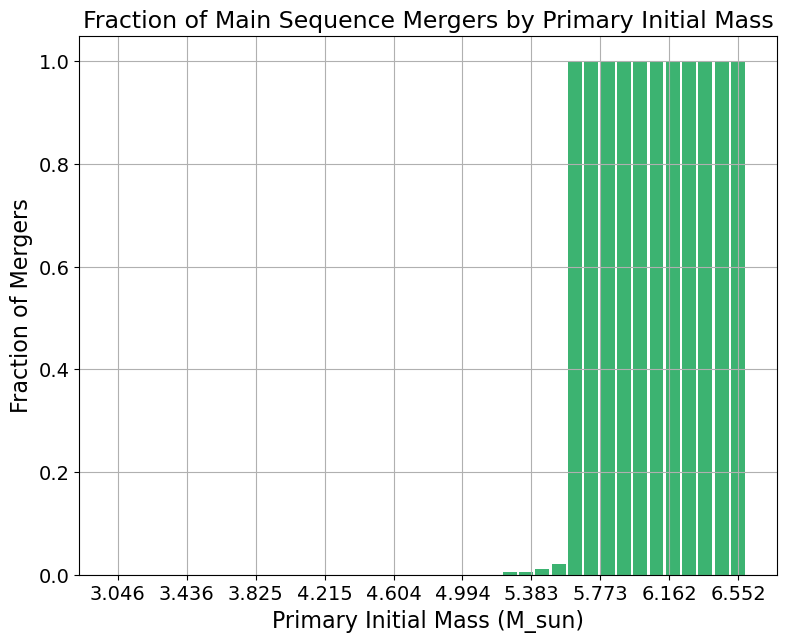

<Figure size 640x480 with 0 Axes>

In [61]:
plot_fractional_yield_m1('COMPAS_Output.h5', pdf = True)

In [8]:
def plot_results(filename, Z, Age, other_info = '', pdf = False):
    data = h5.File(filename)
    SP = data['BSE_System_Parameters']
    SP_df = pd.DataFrame({
                'L1': SP['Luminosity(1)'][()],
                'L2': SP['Luminosity(2)'][()],
                'Teff1': SP['Teff(1)'][()],
                'Teff2': SP['Teff(2)'][()],
                'type1': SP['Stellar_Type(1)'][()],
                'type2': SP['Stellar_Type(2)'][()],
                'Init_SemiMajorAxis': AU_to_Rsol(SP['SemiMajorAxis@ZAMS'][()]),
                'Merger': SP['Merger'][()],
                'Mass_ZAMS1': SP['Mass@ZAMS(1)'][()],
                'Mass_ZAMS2': SP['Mass@ZAMS(2)'][()]
            })
    merger_SP_df = restrict(SP_df, 'Merger', 1, 1)
    MS_merger_SP_df = restrict(restrict(SP_df, 'Merger', 1, 1), 'type1', 0, 1)
    print('Total merger fraction: ', merger_SP_df.shape[0]/SP_df.shape[0])
    print('MS merger fraction: ', MS_merger_SP_df.shape[0]/SP_df.shape[0])


    ax = sns.displot(MS_merger_SP_df, x="Init_SemiMajorAxis", color='mediumseagreen') #kind="kde")
    for ax in ax.axes.flat:
        ax.set_xlabel('Semi-major Axis at ZAMS (Rsun)', fontsize=14)
        ax.set_ylabel('Count', fontsize=14)
        ax.set_title('Initial Semi-major Axis Distribution of\nMain Sequence Mergers', fontsize=15, wrap = True)
        ax.tick_params(axis='both', which='major', labelsize=14)
    if pdf:
        plt.savefig(filename + "_init_a.pdf", format="pdf", bbox_inches='tight')
    print("Max and Min of Semi-major axis at ZAMS: ", MS_merger_SP_df.Init_SemiMajorAxis.min(), MS_merger_SP_df.Init_SemiMajorAxis.max())

    MS_merger_SP_df.loc[:, "q"] = MS_merger_SP_df.Mass_ZAMS2 / MS_merger_SP_df.Mass_ZAMS1
    ax = sns.displot(MS_merger_SP_df, x="q", color='mediumseagreen') #kind="kde")
    for ax in ax.axes.flat:
        ax.set_xlabel('Mass Ratio', fontsize=14)
        ax.set_ylabel('Count', fontsize=14)
        ax.set_title('Initial Mass Ratio Distribution of\nMain Sequence Mergers', fontsize=15, wrap = True)
        ax.tick_params(axis='both', which='major', labelsize=14)
    if pdf:
        plt.savefig(filename + "_init_q.pdf", format="pdf", bbox_inches='tight')
    print("Max and Min of q = M2/M1: ", MS_merger_SP_df.q.min(), MS_merger_SP_df.q.max())


    merger_progenitor = restrict(restrict(restrict(SP_df, 'type1', 0, 1), 'type2', 0, 1) , 'Mass_ZAMS2', 0.2, 10)
    print('min mass_2: ', merger_progenitor.Mass_ZAMS2.min())
    plt.figure(figsize=(10,9))
    plt.scatter(merger_progenitor.Teff1, merger_progenitor.L1, label = 'Primary', s = 20, c = "#DA70D6")
    plt.scatter(merger_progenitor.Teff2, merger_progenitor.L2, label = 'Secondary', s = 20, c = "#7BC8F6")
    plt.scatter(MS_merger_SP_df.Teff1, MS_merger_SP_df.L1, label = 'Merger product', s = 20, c = "#15B01A")
    plt.gca().invert_xaxis()
    plt.title('Main Sequence HRD: Z = ' + str(Z) + ', Age (Myr) = '+ str(Age) + other_info, loc = 'center', wrap = True, fontsize = 17)
    plt.xlabel('Effective Temperature (K)', fontsize = 17)
    plt.ylabel('Luminosity (Lsun)', fontsize = 17)
    plt.yscale('log')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=14)
    if pdf:
        plt.savefig(filename + "_HRD.pdf", format="pdf")

    return

print(SP['SemiMajorAxis@ZAMS'].attrs['units'])

Number of systems = 10,000

Total merger fraction:  0.4189
MS merger fraction:  0.095
Max and Min of Semi-major axis at ZAMS:  0.013560716510852392 0.06689975363470307
Max and Min of q = M2/M1:  0.1626016260162602 1.0


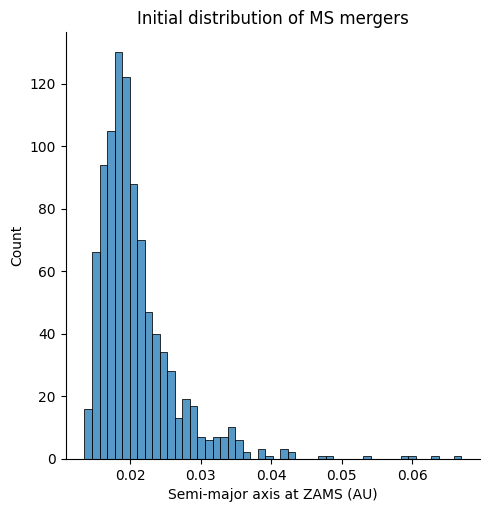

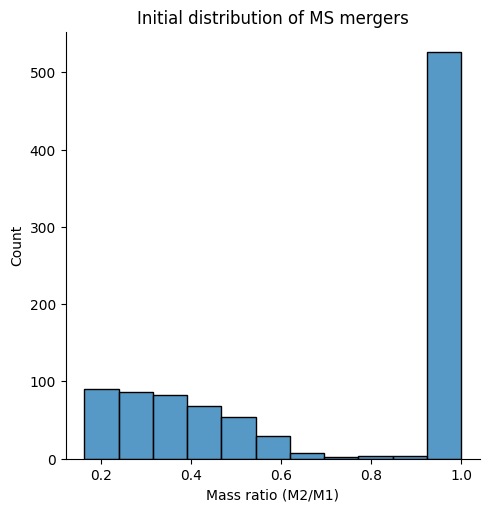

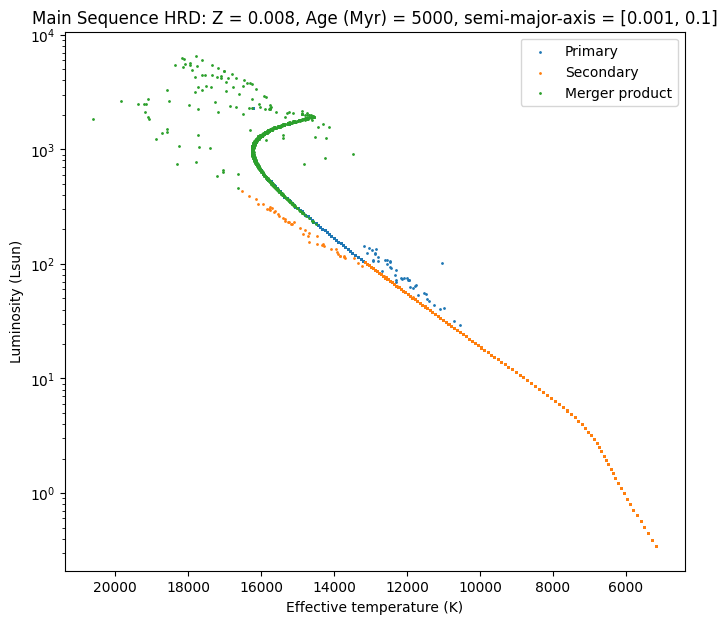

In [19]:
plot_results('COMPAS_Output_M0.8to3to6_80Myr.h5', 0.008, 5000, other_info = ', semi-major-axis = [0.001, 0.1]')

Initial semi-major axis peaks at 0.02 for systems that merge on the MS (excludes non-MS mergers). 
Initial mass ratio peaks just below 1. 
When the initial semi-major axis is controlled, the stars do merge on the MS frequently.

Total merger fraction:  0.001001001001001001
MS merger fraction:  0.0
Max and Min of Semi-major axis at ZAMS:  nan nan
Max and Min of q = M2/M1:  nan nan


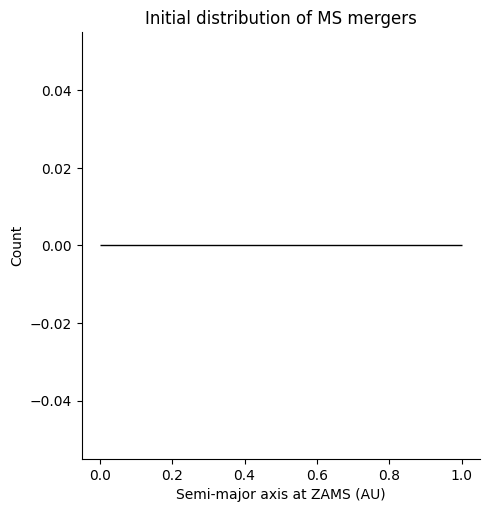

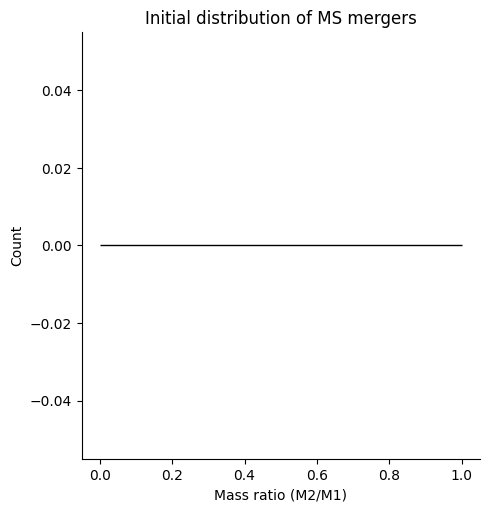

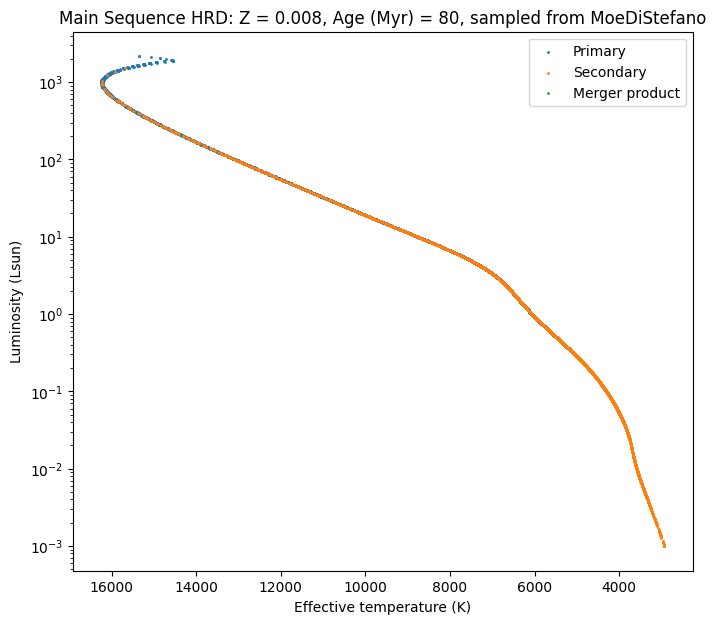

In [20]:
plot_results('COMPAS_Output_sampled.h5', 0.008, 80, other_info = ', sampled from MoeDiStefano')

Total merger fraction:  0.07317317317317318
MS merger fraction:  0.0
Max and Min of Semi-major axis at ZAMS:  nan nan
Max and Min of q = M2/M1:  nan nan


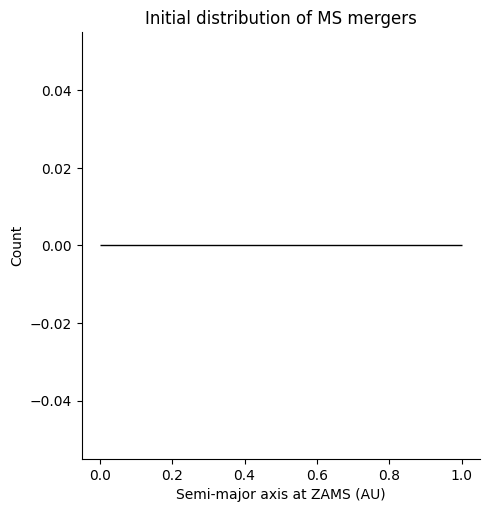

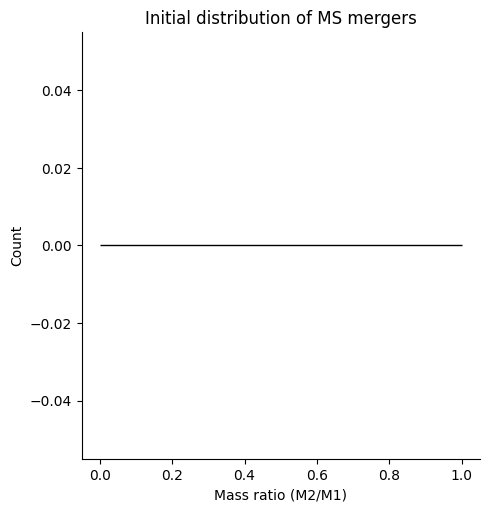

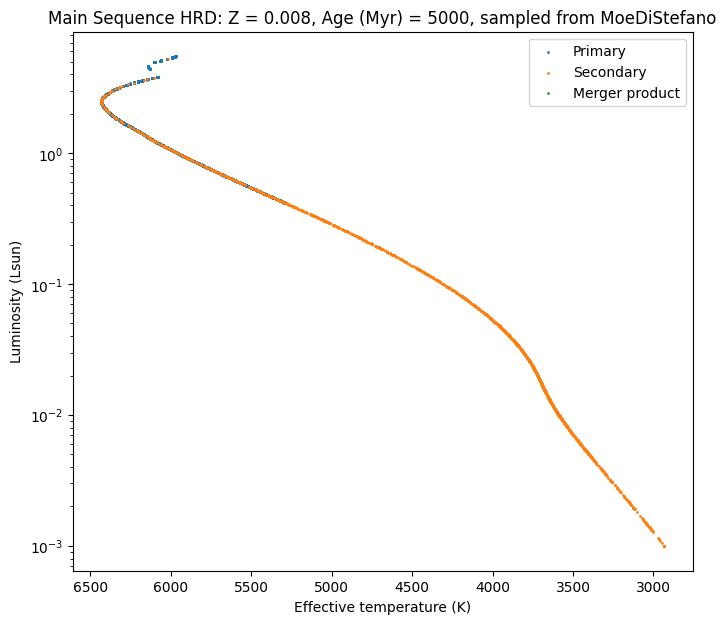

In [22]:
plot_results('COMPAS_Output_sampled_5Gyr.h5', 0.008, 5000, other_info = ', sampled from MoeDiStefano')

Total merger fraction:  0.08308308308308308
MS merger fraction:  0.0
Max and Min of Semi-major axis at ZAMS:  nan nan
Max and Min of q = M2/M1:  nan nan


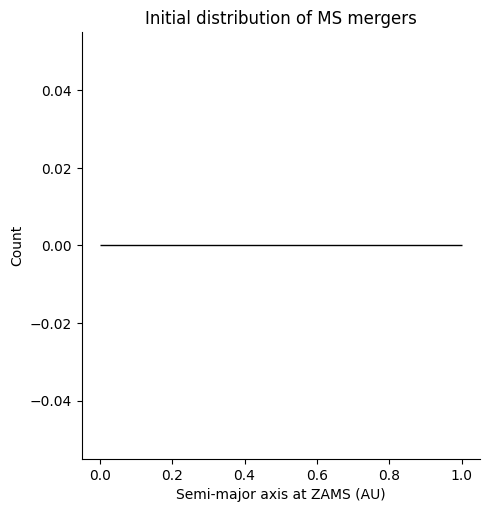

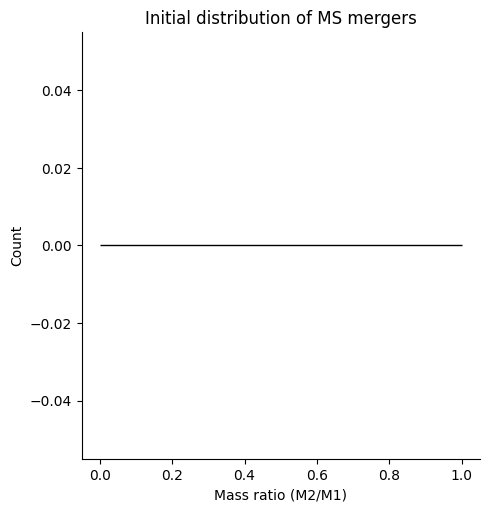

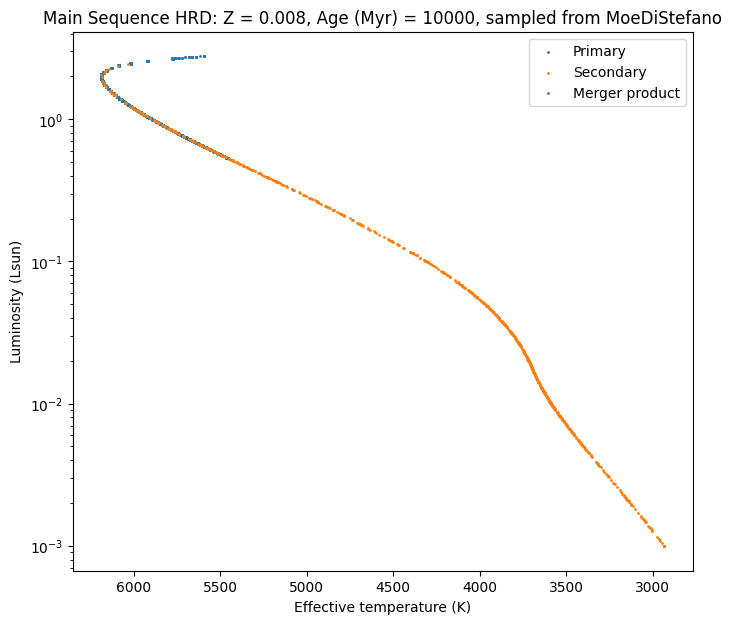

In [21]:
plot_results('COMPAS_Output_sampled_10Gyr.h5', 0.008, 10000, other_info = ', sampled from MoeDiStefano')

When I use the output from the MoeDiStefano sampler as it is, the systems do not merge, up to 10 Gyr simulation time. Most stars have an initial mass or ~ 1-2 Msun. 

Total merger fraction:  0.0672
MS merger fraction:  0.055
Max and Min of Semi-major axis at ZAMS:  0.0041107891941089755 0.04829860132359818
Max and Min of q = M2/M1:  0.018607288452627883 1.0


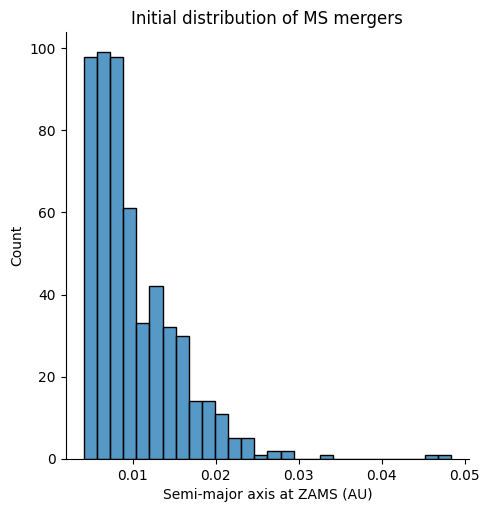

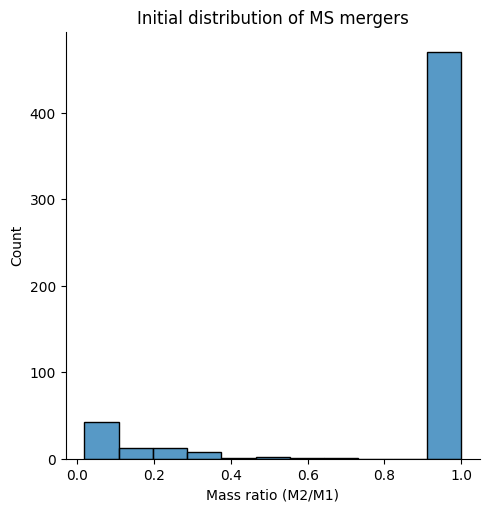

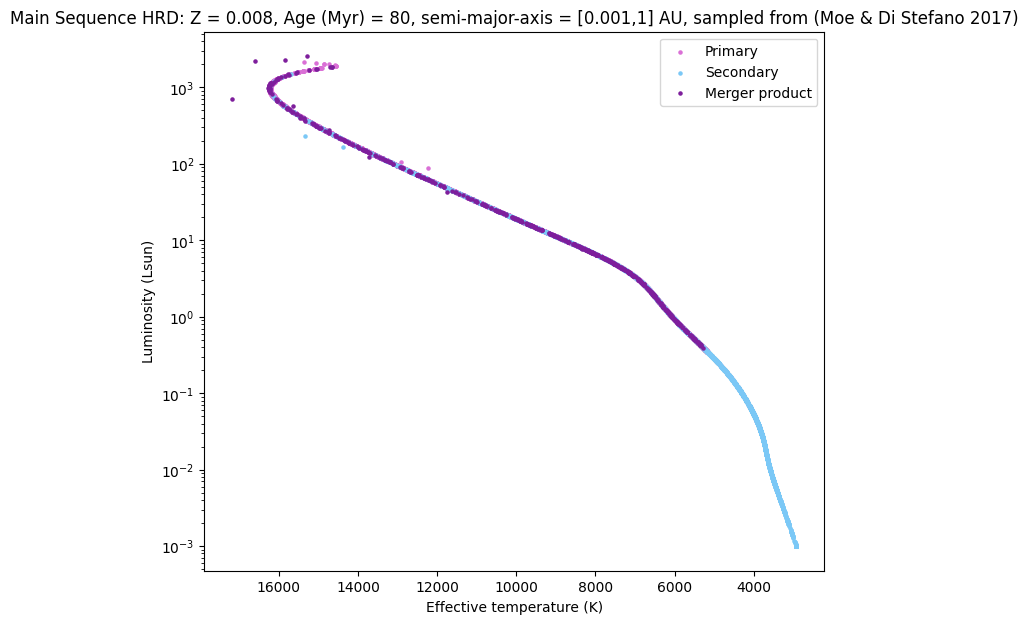

In [18]:
plot_results('COMPAS_Output_sampled_80Myr.h5', 0.008, 80, other_info = ', semi-major-axis = [0.001,1] AU, sampled from (Moe & Di Stefano 2017)')

But when I do control the initial semi-major axis (and use the sampled initial masses only, excluding orbital period and eccentricity), the systems do merge and distribution peaks at ~ 0.01 (semi-major axis) and ~ 0.9 (mass ratio).  

Total merger fraction:  0.0443
MS merger fraction:  0.003
Max and Min of Semi-major axis at ZAMS:  10.361719391682199 42.198332853033676
Max and Min of q = M2/M1:  0.14954734219089 0.46622132330081706
min mass_2:  0.3056230565611777


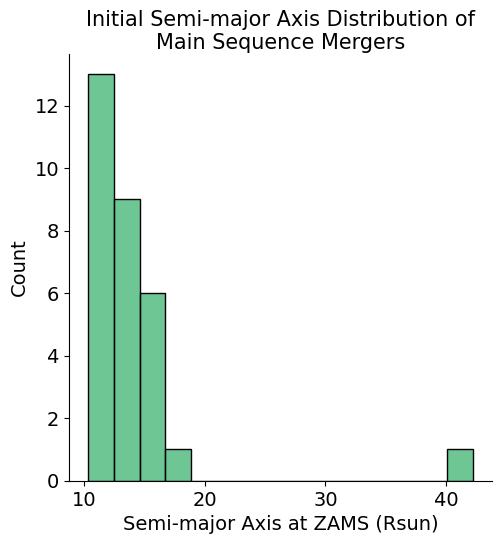

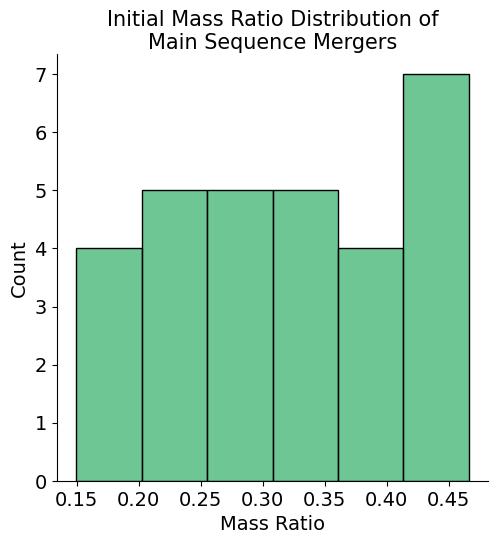

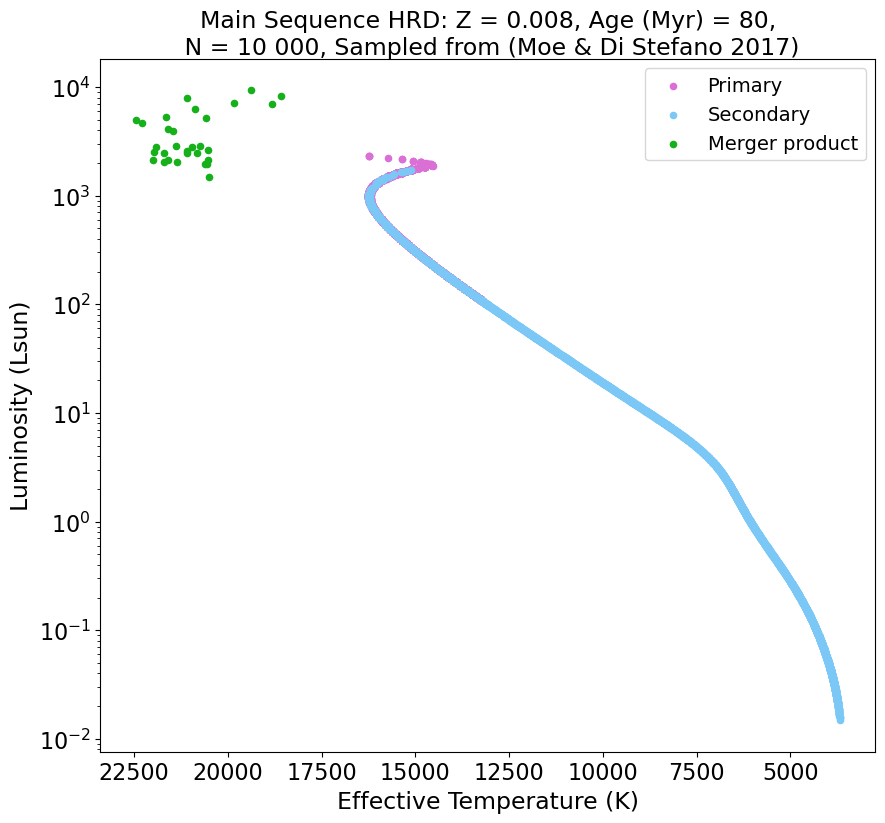

In [9]:
plot_results('COMPAS_Output.h5', 0.008, 80, other_info = ',\n N = 10 000, Sampled from (Moe & Di Stefano 2017)', pdf = True)

When I restrict the mass range to [3,7] which is +/- 2 from the MSTO mass of 5Msun NGC 1755 (Z = 0.008, ~ 80 Myr old), one of them merge on the MS. The number of systems is still 10,000.

Only 1 out of 10,000 systems merged on MS

Total merger fraction:  0.04778
MS merger fraction:  8e-05
Max and Min of Semi-major axis at ZAMS:  0.04863098490070394 0.06557215967860586
Max and Min of q = M2/M1:  0.1577180410461524 0.9903874654643016


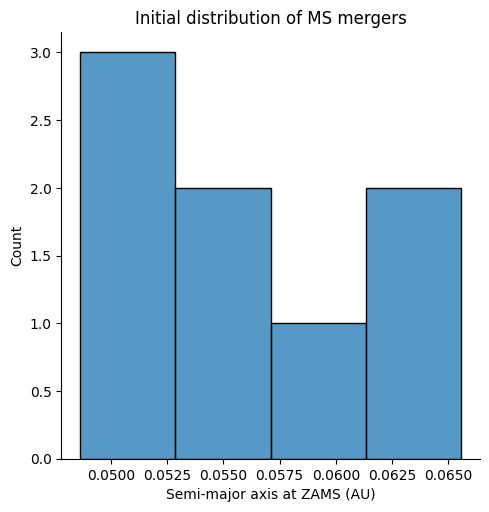

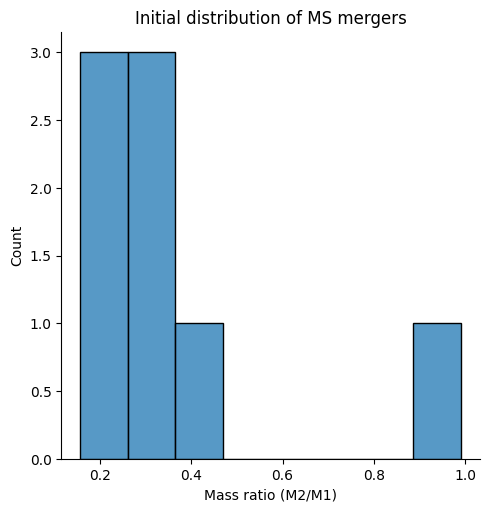

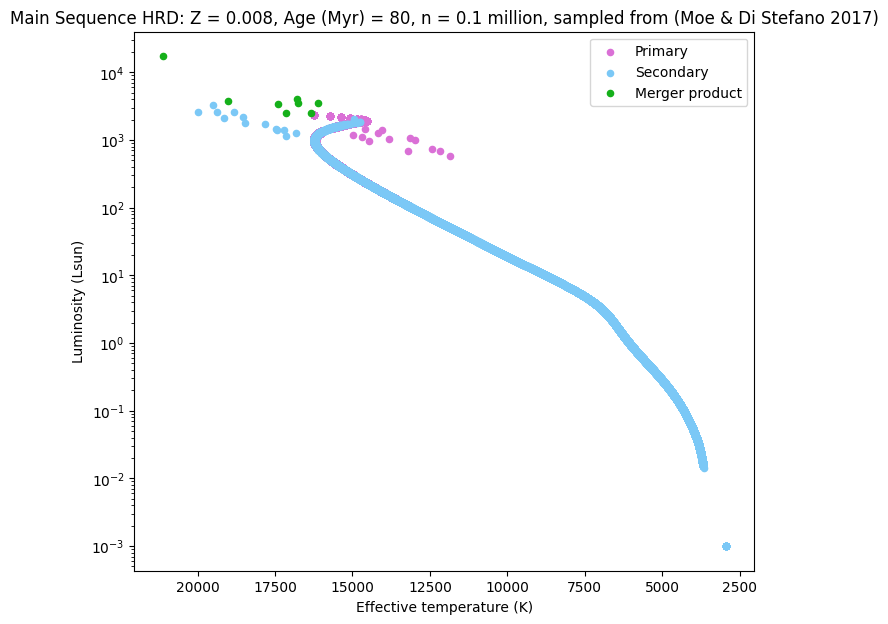

In [10]:
plot_results('COMPAS_Output_sampled_M3to7_0.1mil.h5', 0.008, 80, other_info = ', n = 0.1 million, sampled from (Moe & Di Stefano 2017)')

is it a photometric effect, two stars with no mass transfer but twice the luminoisty, threshold for resolving binaries, two close stars appear wider than observed can be observed as single stars

Keeping everything the same as before, if I increase the number of systems to 100,000 we observe more binaries merging on the MS. 